## Vector Space Models

#### Word by word

Number of times that the two words occur together within a distance k (number of words between them).


I like `simple data`.

I prefer `simple raw data`.

I tend to store my `data` in standardized and `simple` way.


For words `data` and `simple` and k=2 we have cooccurence 2 (2 times word simple appears next to word data within the range of 2)

Word data can be then represented as vector with distances to each word:

    simple raw like I
data [2  1  1  0]

---
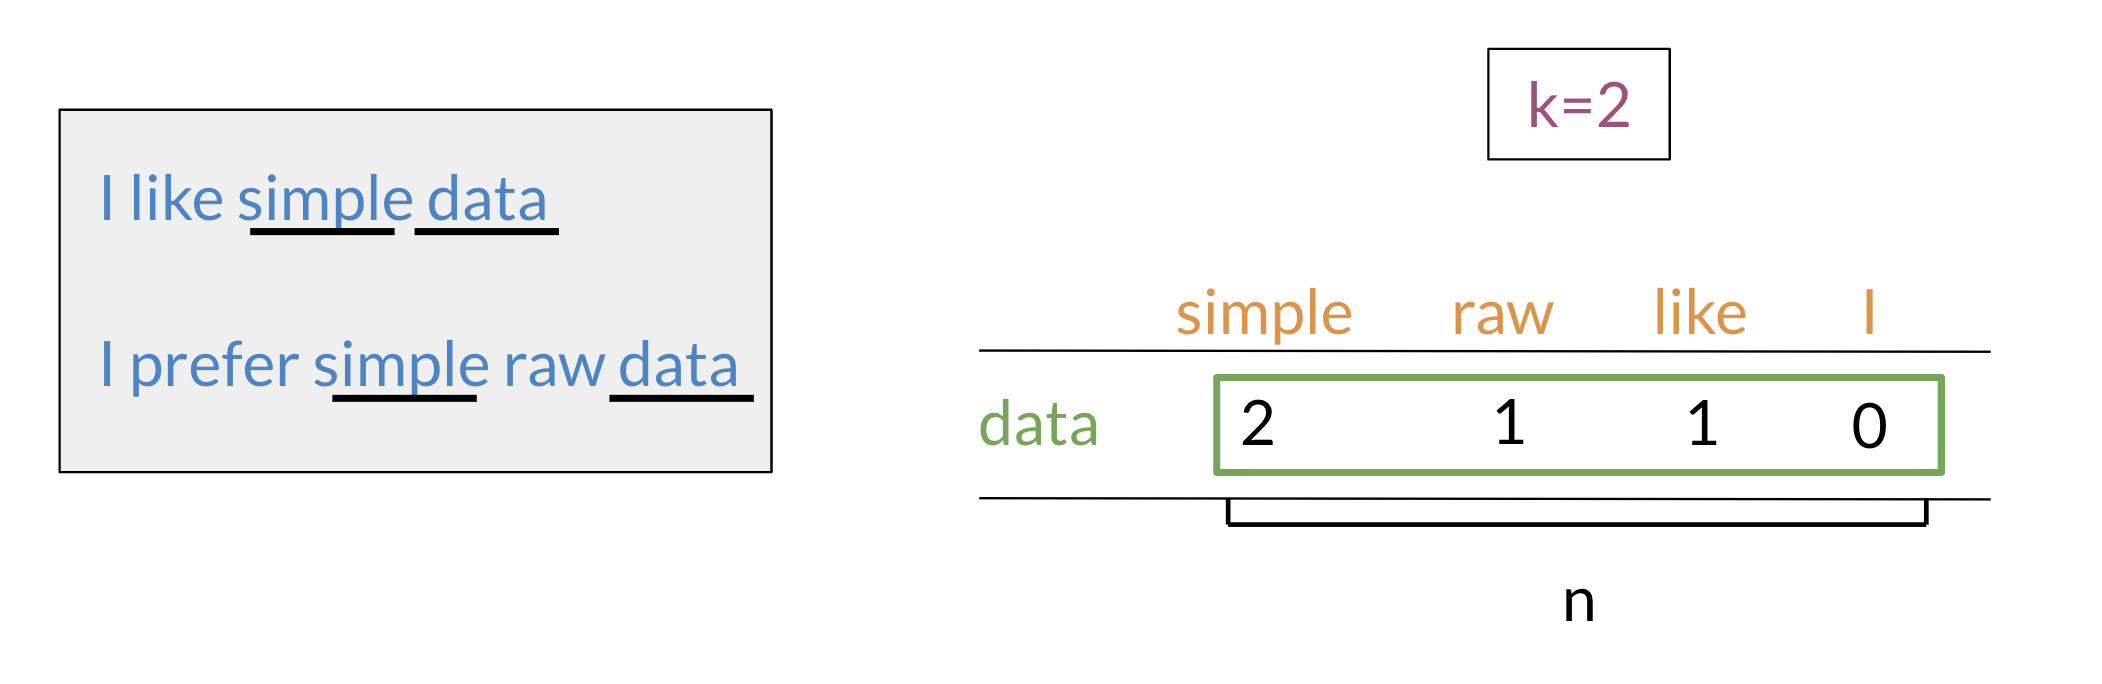

#### Word by document

Count the number of times that word appears in documnets from each category.

Categories = [ENTERTAINMENT, ECONOMY, ML]

data 500 6620 9320

film 7000 4000 1000

Word data can be then represented as vector:

data [500,6620,9320]

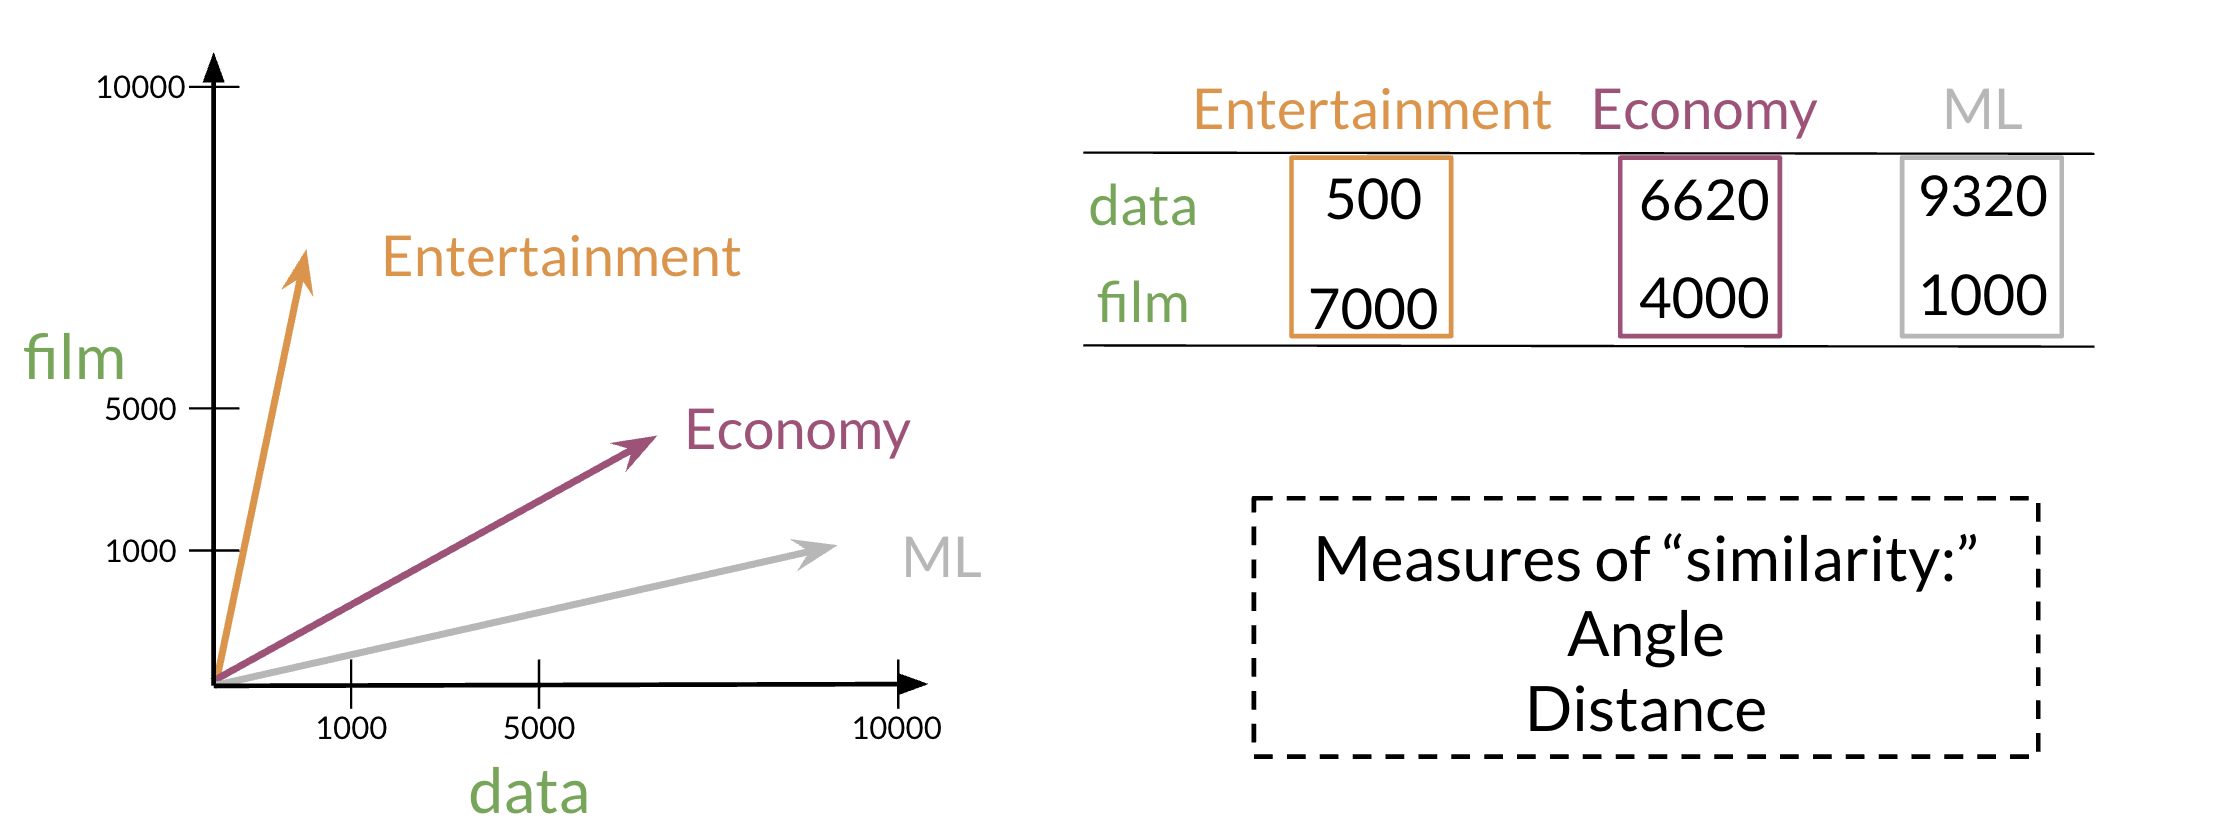

#### Euclidean distance

Distance between points in space (or as we can treat it vectors):

P1=(a1,b1,c1)

P2=(a2,b2,c1)

$$ Distance = \sqrt{(a1-a2)^{2}+(b1-b2)^{2}+(c1-c2)^{2}} $$

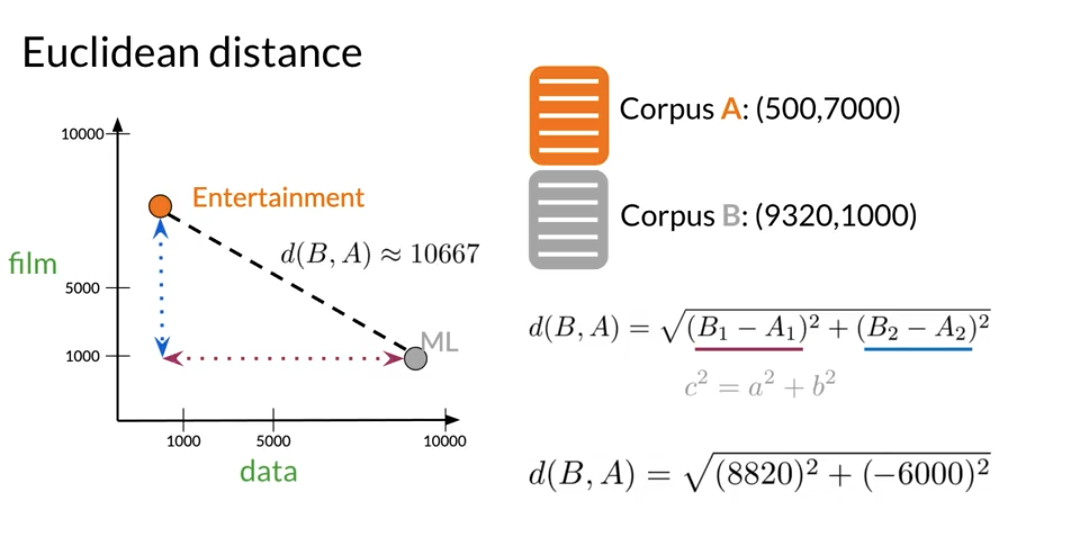

In [3]:
import numpy as np

v=np.array([1,2,3])
w=np.array([4,5,6])

d=np.linalg.norm(v-w)
d

5.196152422706632

#### Cosine similarity

Distancebetween vectors can be also described by the cosine value of the angle between them. It is less vulnerable to the length distance deifference between them and focuses on the `vector direction`.

Vector norm:

$$ ||\vec{v}|| = \sqrt{\sum{v^2_i}} $$

Dot product:

$$ \vec{v} \cdot \vec{w} = \sum{v_i \cdot w_i} $$

Cosine:

$$ cos(\beta) = \frac{\vec{v} \cdot \vec{w}}{||\vec{v}||||\vec{w}||} $$

Example:

$ v=(20,40) $
$ w=(30,20) $
$$ \vec{v} \cdot \vec{w} = \frac{(20 \times 30) + (40 \times 20)}{\sqrt{20^2+40^2} \times \sqrt{30^2+20^2}} = 0.87 $$

For $ cos(\beta) = -1 $ the two vecros are orhogonal meaning very different and for  $ cos(\beta) = 1 $ they point in the same direction. If $ cos(\beta) = 0 $ words are orthogonal.

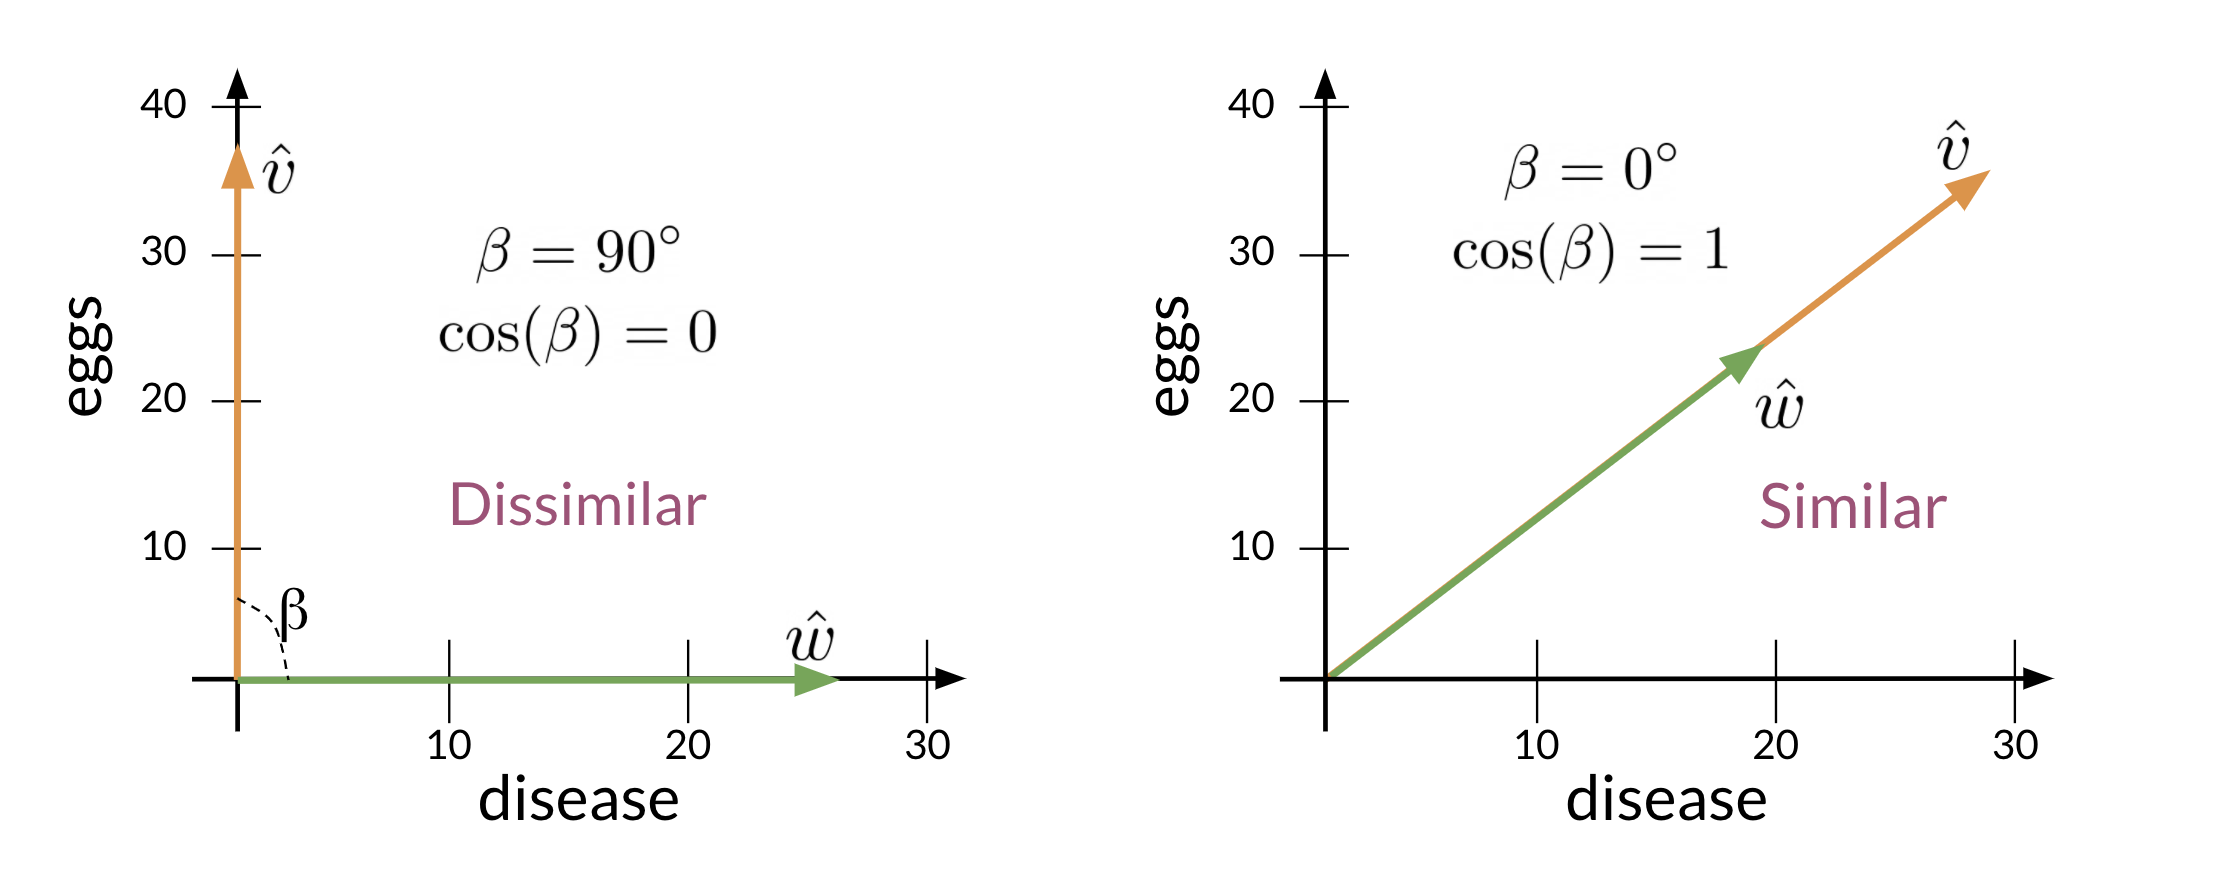

In [14]:
import numpy as np

v=np.array([1,2,3])
w=np.array([4,5,6])

cosine_similarity=np.dot(v,w)/(np.linalg.norm(v)*np.linalg.norm(w))
cosine_similarity

0.9746318461970762

### Manipulating word embeddings

In [11]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [9]:
word_embeddings=pickle.load(open('data/word_embeddings_subset.p','rb'))
len(word_embeddings)

243

In [10]:
word_vector=word_embeddings['country']
word_vector

array([-0.08007812,  0.13378906,  0.14355469,  0.09472656, -0.04736328,
       -0.02355957, -0.00854492, -0.18652344,  0.04589844, -0.08154297,
       -0.03442383, -0.11621094,  0.21777344, -0.10351562, -0.06689453,
        0.15332031, -0.19335938,  0.26367188, -0.13671875, -0.05566406,
        0.07470703, -0.00070953,  0.09375   , -0.14453125,  0.04296875,
       -0.01916504, -0.22558594, -0.12695312, -0.0168457 ,  0.05224609,
        0.0625    , -0.1484375 , -0.01965332,  0.17578125,  0.10644531,
       -0.04760742, -0.10253906, -0.28515625,  0.10351562,  0.20800781,
       -0.07617188, -0.04345703,  0.08642578,  0.08740234,  0.11767578,
        0.20996094, -0.07275391,  0.1640625 , -0.01135254,  0.0025177 ,
        0.05810547, -0.03222656,  0.06884766,  0.046875  ,  0.10107422,
        0.02148438, -0.16210938,  0.07128906, -0.16210938,  0.05981445,
        0.05102539, -0.05566406,  0.06787109, -0.03759766,  0.04345703,
       -0.03173828, -0.03417969, -0.01116943,  0.06201172, -0.08

In [15]:
words=['oil','gas','happy','sad','city','town','village','petroleum','joyful']
vectors=np.array([word_embeddings[word] for word in words])

In [18]:
vectors[:,3]

array([ 0.06396484,  0.01080322,  0.02539062, -0.04467773, -0.04003906,
       -0.16113281, -0.21582031,  0.10888672,  0.08398438], dtype=float32)

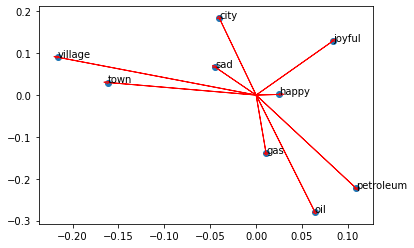

In [33]:
plt.scatter(vectors[:,3],vectors[:,2])
for vector,word in zip(vectors,words):
    plt.arrow(0,0,vector[3],vector[2],head_width=0.005,head_length=0.005,ec='r',width=1e-5)
    plt.annotate(word,(vector[3],vector[2]))

#### word distance

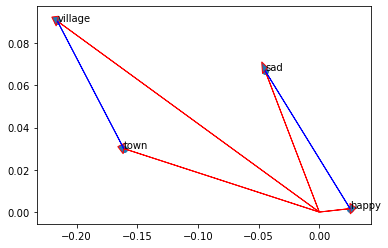

In [40]:
words=['happy','sad','town','village']
vectors=np.array([word_embeddings[word] for word in words])

plt.scatter(vectors[:,3],vectors[:,2])
for vector,word in zip(vectors,words):
    plt.arrow(0,0,vector[3],vector[2],head_width=0.005,head_length=0.005,ec='r',width=1e-5)
    plt.annotate(word,(vector[3],vector[2]))
diff=vectors[1]-vectors[0]
plt.arrow(vectors[0,3],vectors[0,2],diff[3],diff[2],ec='b',width=1e-5)
diff=vectors[3]-vectors[2]
plt.arrow(vectors[2,3],vectors[2,2],diff[3],diff[2],ec='b',width=1e-5)

#### Norm

In [42]:
np.linalg.norm(word_embeddings['city'])

2.3105447

#### predicting capitals

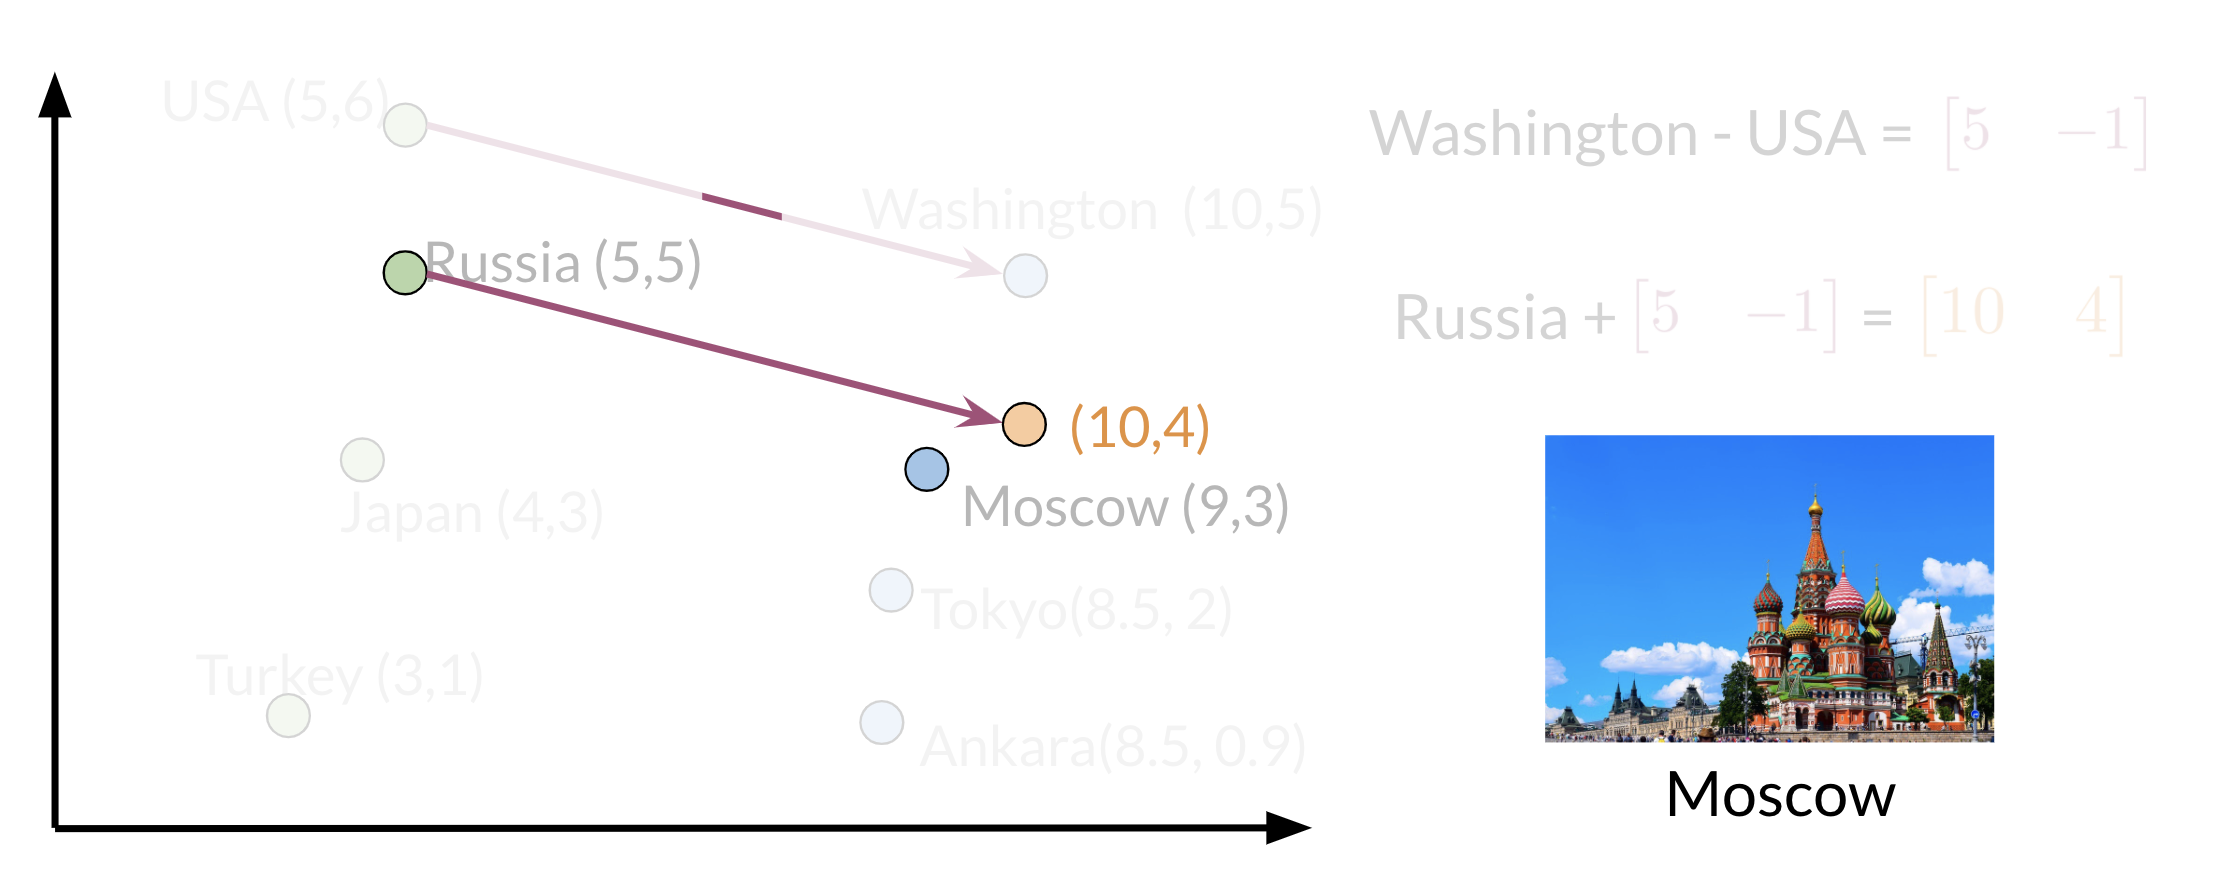

In [43]:
capital=word_embeddings['France']-word_embeddings['Paris']

In [46]:
country=word_embeddings['Madrid']+capital
country[0:10]

array([-0.02905273, -0.2475586 ,  0.53952026,  0.20581055, -0.14862823,
       -0.18334961, -0.15527344, -0.13989258, -0.02709961,  0.22644043],
      dtype=float32)

In [50]:
word_embeddings['Spain'][0:10]

array([ 0.03149414, -0.18261719,  0.16308594,  0.12451172, -0.01855469,
       -0.17382812, -0.12109375, -0.1328125 , -0.125     ,  0.24511719],
      dtype=float32)

In [48]:
diff=country-word_embeddings['Spain']
diff[0:10]

array([-0.06054688, -0.06494141,  0.37643433,  0.08129883, -0.13007355,
       -0.00952148, -0.03417969, -0.00708008,  0.09790039, -0.01867676],
      dtype=float32)

In [51]:
keys=word_embeddings.keys()
data=[word_embeddings[key] for key in keys]
embedding=pd.DataFrame(data=data,index=keys)

In [52]:
embedding.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,...,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025


In [53]:
def find_closest_word(v,k=1):
    diff=embedding.values-v
    delta=np.sum(diff**2,axis=1)#squared euclidian distance
    i=np.argmin(delta)
    return embedding.iloc[i].name

In [54]:
find_closest_word(country)

'Spain'

In [55]:
find_closest_word(word_embeddings['Berlin']+capital)

'Germany'

Bug:

In [56]:
find_closest_word(word_embeddings['Lisbon']+capital)

'Lisbon'

#### represent sentence as vector

In [58]:
sentence='Spain petroleum city king'
voc=[word_embeddings[word] for word in sentence.split(" ")]
doc2voc=np.sum(voc,axis=0)
find_closest_word(doc2voc)

'petroleum'

***

## PCA

#### Principle Component Analysis

A way to `reduce number of features` by transforming a large set of variables into a smaller one that still contains most of the information in the large set.


`PCA` is based on the Singular Value Decomposition `SVD` of the Covariance Matrix of the original dataset. The Eigenvectors of such decomposition are used as rotation matrix. The Eigenvectors are arranged in the rotation matrix in decreasing order according to its explained variance. The last is related to the EigenValues of the `SVD`.

We look for a `vector` z that will fit the data so that the `distance` between the `origin and the point's perpedicular intersection with it` is `the smallest`. Unlike in the linear regression where the we minimize the vertical distance between point and the line. 

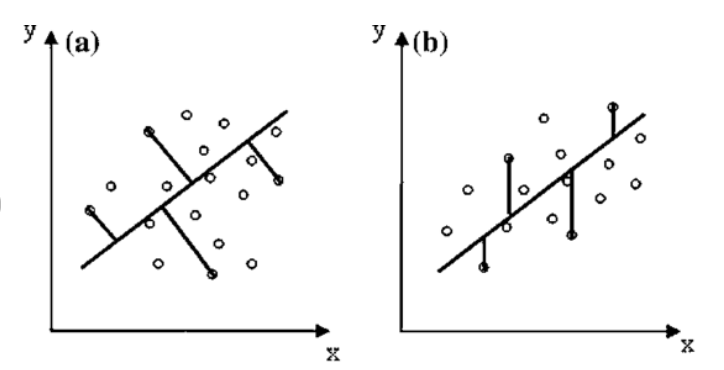

PCA consists of:
- normalizing
- feature scaling
- computing covariance matrix

mean normalize, get the covariance matrix, perform SVD, dot product the data, reconstruct data

For a 2D example we map the values (x,y) onto a new axis and represent points by on value from new axis.

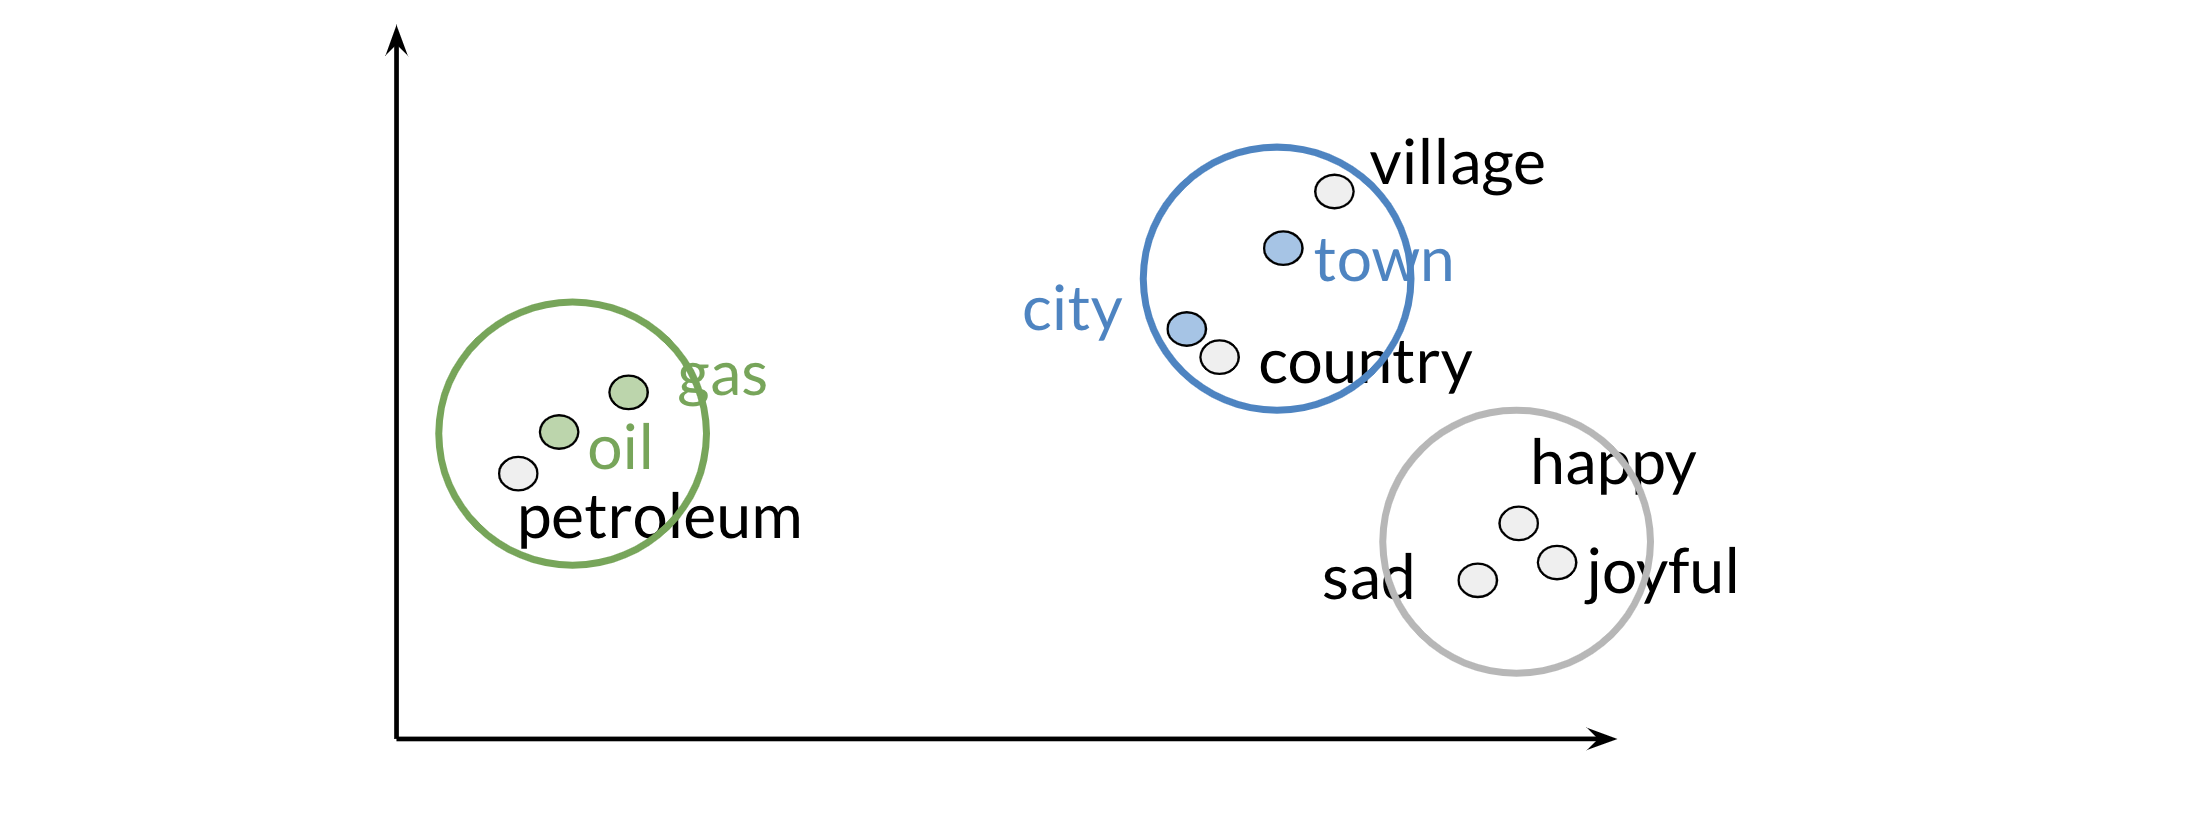

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from sklearn.decomposition import PCA

In [7]:
np.random.seed(1)
n=1
x=np.random.uniform(1,2,1000)
y=x.copy()*n
x=x-np.mean(x)
y=y-np.mean(y)

data=pd.DataFrame({'x':x,'y':y})
pca=PCA(n_components=2)
pcaTr=pca.fit(data)

data_pca=pcaTr.transform(data)
data_pca=pd.DataFrame(data=data_pca,columns=['PC1','PC2'])

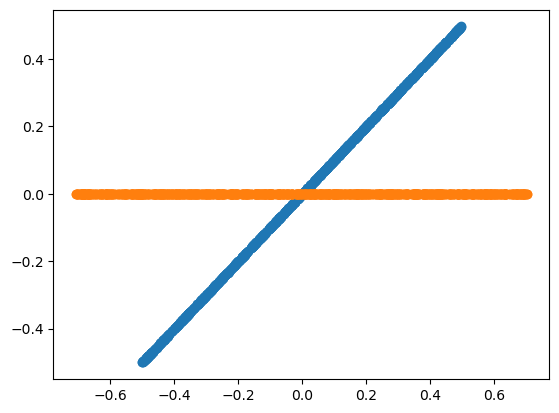

In [8]:
plt.scatter(data.x,data.y)
plt.scatter(data_pca.PC1,data_pca.PC2)

---

#### transformation model pcaTr

PCA model is composed of a rotation matrix and its corresponding explained variance.
- `pcaTr.components_` has the rotation matrix
- `pcaTr.explained_variance_` has the explained variance of each principal component

In [4]:
print(f'Eigenvectors: \n{pcaTr.components_}')
print(f'Eigenvalues: \n{pcaTr.explained_variance_}')

Eigenvectors: 
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
Eigenvalues: 
[1.66465230e-01 2.08930963e-34]


$$ cos(45^0) = 0.7071 $$
The rotation matrix is equal to:
$$ R = \begin{bmatrix} cos(45^0) & sin(45^o) \\ -sin(45^o) & cos(45^o) \end{bmatrix} $$

As $45^o$ is the same angle as that trom the variables y=1*x

Then PCA has identyfied the angle in which point the original variables.

And the explained Variance is around [0.166 0]. Remember that the Variance of a uniform random variable x ~ U(1,2) as our x and y is equal to:

$$ Var(x) = \frac{(2-1)^2}{12} = 0.08333 $$

Then the explained variance given by the PCA can be interpreted as

$$ [Var(x) + Var(y), \ 0] = [0.08333 + 0.08333, \ 0] = [0.166, \ 0] $$

Which means that all the explained variance of our new system is explained by our first principal component.

#### Correlated normal random variables

In [5]:
np.random.seed(100)

#standard deviation
std1=1
std2=0.333

x=np.random.normal(0,std1,1000)
y=np.random.normal(0,std2,1000)

#centering data
x=x-np.mean(x)
y=y-np.mean(y)

# pair of independent variables with a desired amount of covariance
n=1
angle=np.arctan(1/n)
print(f'angle: {angle*180/math.pi}')

rotation_matrix=np.array([[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]])
print(f'rotation matrix: \n {rotation_matrix}')

xy=np.concatenate(([x],[y]),axis=0).T
data=np.dot(xy,rotation_matrix)

angle: 45.0
rotation matrix: 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


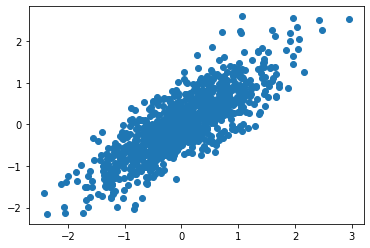

In [6]:
plt.scatter(data[:,0],data[:,1])

#### PCA

`Original` and `transformed` system in the same plot alogside with `Principal Component` vectors in red and blue.

In [7]:
pca=PCA(n_components=2)
pcaTr=pca.fit(data)
data_pca=pcaTr.transform(data)
print(f'Eigenvectors: \n{pcaTr.components_}')
print(f'Eigenvalues: \n{pcaTr.explained_variance_}')

Eigenvectors: 
[[ 0.70827652  0.7059351 ]
 [-0.7059351   0.70827652]]
Eigenvalues: 
[1.09488457 0.11243237]


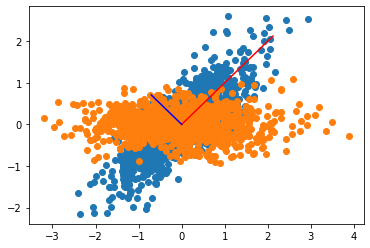

In [11]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(data_pca[:,0],data_pca[:,1])
plt.plot([0,rotation_matrix[0][0]*std1*3],[0,rotation_matrix[0][1]*std1*3],color='r')
plt.plot([0,rotation_matrix[1][0]*std2*3],[0,rotation_matrix[1][1]*std2*3],color='b')

The explanation of this chart is as follows:
- the rotation matrix used to create the correlated variables took the original uncorrelated variavles `x` and `y` and transformed them into the blue points. 
- the `PCA` tranformation finds out the rotation matrix used to create correlated variables (blue points). Using the `PCA` model to transform data, puts back the variables as the original uncorrelated variables (blue points).
- the explained Variance of the `PCA` is

$$ [1.0095, 0.1124] $$

which is approximately

$$ [1,0.333 \times 0.333] = [std1^2, std2^2] $$

the parameters of our original random variables `x` and `y`

#### PCA

Principal components contained in the `rotation matrix` are `decreasingly sorted` depending on its `explained Variance`. It usually means that the `first components retain most of the power of the data` to explain the patterns that **generalize** the data. Nevertheless, for some applications patterns that explain much less Variance are interesting eg. novelty detection.

In the figure we can see original data and its corresponding projection using dimention axes as principal components. Data was compromised of a single variable.

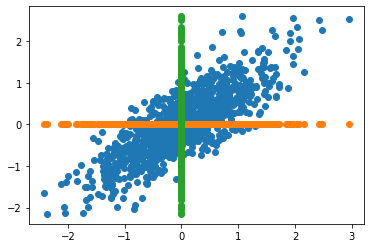

In [12]:
n=len(data)
plt.scatter(data[:,0],data[:,1])
plt.scatter(data[:,0],np.zeros(n))
plt.scatter(np.zeros(n),data[:,1])

*** 

## Word vectors

In NLP each word is represented by `vectors` consisting of numbers. Vector encodes meainng of the word. Numbers for each word are learned using ML models. 

In [12]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [13]:
data=pd.read_csv('data/capitals.txt',delimiter=' ')
data.head()

,Athens,Greece,Baghdad,Iraq
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [14]:
import nltk
from gensim.models import KeyedVectors

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pk764\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Making `subset of word_embeddings` from `embeddings` (google source).

In [11]:
#embeddings=KeyedVectors.load_word2vec_format('./GoogleNews-vectors-navigate300.bin',binary=True)

f=open('capitals.txt','r').read()
set_words=set(nltk.word.tokenize(f))
words=set('king','queen','oil','gas','happy','sad','city','town','village','country','continent','petroleum','joyful')
set_words.update(words)

def get_word_embeddings(embeddings):
    word_embeddings={}
    for word in set_words:
        word_embeddings[word]=embeddings[word]
    return word_embeddings

In [12]:
#word_embeddings=get_word_embeddings(embeddings)
#pickle.dump(word_embeddings,open('data/word_embeddings_subset.p','wb'))

In [16]:
word_embeddings=pickle.load(open('data/word_embeddings_subset.p','rb'))
len(word_embeddings)

243

In [35]:
#word_embeddings

In [18]:
word_embeddings['country'].shape

(300,)

### Predicting relationships

#### cosine similarity

$$ cos(\beta) = \frac{A \cdot B}{||A||||B||} = \frac{\sum{A_i B_i}}{\sqrt{\sum{A_{i}^{2}}} \sqrt{\sum{B_{i}^{2}}}} $$

$A$ and $B$ represent word vectors and $A_i$ or $B_i$ represent index of that vector.

In [19]:
def cosine_similarity(A,B):
    '''
    Parameters:
    -----------
        A: np array (word vector)
        B: np array (word vector)
    Returns:
    --------
        cos: float (cosine similarity between A and B)
    '''
    dot = np.dot(A,B)
    norm_a=np.linalg.norm(A)
    norm_b=np.linalg.norm(B)
    cos=dot/(norm_a*norm_b)
    return cos

In [20]:
king=word_embeddings['king']
queen=word_embeddings['queen']
cosine_similarity(king,queen)

0.6510957

#### euclidean distance

$$ D(A,B) = D(B,A) = \sqrt{(A_1-B_1)^{2}+(A_2-B_2)^{2}+...+(A_n-B_n)^{2}} = \sqrt{\sum{(A_i-B_i)^2}} $$

$n$ is number of elements in vector. The more similar words, the more likely Euclidean distance will be close to 0.

In [21]:
def euclidean(A,B):
    '''
    Parameters:
    -----------
        A: np array (word vector)
        B: np array (word vector)
    Returns:
    --------
        d: float (euclidean distance between A and B)
    '''
    d=np.linalg.norm(A-B)
    return d

In [22]:
euclidean(king,queen)

2.4796925

#### predicting capitals

In [23]:
def get_country(city1,country1,city2,embeddings):
    '''
    Parameters:
    -----------
        city1,city2: string (capital cities names)
        country1: string (country of city1)
        embeddings: dict witk words and their embeddings
    
    Returns:
    --------
        city2: string (capital city of country2)
    '''
    vec_diff=embeddings[country1]-embeddings[city1]
    country2=vec_diff+embeddings[city2]
    excluded=[city1,city2,country1]
    similarity={}
    
    for word in embeddings.keys():
        similarity[word]=cosine_similarity(embeddings[word],country2)
    
    for word in excluded:
        similarity.pop(word)
    
    country2=max(similarity,key=similarity.get)
    
    return (country2,similarity[country2])

In [24]:
get_country('Athens','Greece','Cairo',word_embeddings)

('Egypt', 0.7626821)

#### model accuracy

In [25]:
def get_accuracy(embeddings,data):
    '''
    Paramaters:
    -----------
        embeddings: dict witk words and their embeddings
        data: DataFrame with all country-capital pairs
    Returns:
    --------
        accuracy: str
    '''
    n=len(data)
    incorrect=0
    for i in range(n):
        city1=data.iloc[i]['city1']
        city2=data.iloc[i]['city2']
        country1=data.iloc[i]['country1']
        country2=data.iloc[i]['country2']
        
        prediction=get_country(city1,country1,city2,embeddings)[0]
        
        if prediction!=country2:
            incorrect+=1
    accuracy=(n-incorrect)/n
    return accuracy

In [26]:
data=pd.read_csv('data/capitals.txt',delimiter=' ')
data.columns=['city1','country1','city2','country2']
data.head()

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [78]:
acc=get_accuracy(word_embeddings,data)
print(f'Accuracy: {acc}')

Accuracy: 0.9192082407594425


### pca

In [27]:
from sklearn.decomposition import PCA
import numpy as np

In [28]:
def compute_pca(X,n_components=2):
    '''
    Parameters:
    -----------
        X: (m,n) word vector
        n_components: int (number of components user wants to keep)
    Returns:
    --------
        X_reduced: data transformed in dims.columns + regenerated original data
    '''
    X_demeaned=X-np.mean(X)
    pca=PCA(n_components)
    pcaTr=pca.fit(X_demeaned)
    eigen_vals=pcaTr.explained_variance_
    eigen_vectors=pcaTr.components_
    X_reduced=pcaTr.transform(X_demeaned)
    
    return X_reduced

In [29]:
np.random.seed(1)
X=np.random.rand(3,10)
X_reduced=compute_pca(X,2)
print(f'Original matrix: \n{X}')
print(f'Reduced matrix: \n{X_reduced}')

Original matrix: 
[[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
  1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
  3.96767474e-01 5.38816734e-01]
 [4.19194514e-01 6.85219500e-01 2.04452250e-01 8.78117436e-01
  2.73875932e-02 6.70467510e-01 4.17304802e-01 5.58689828e-01
  1.40386939e-01 1.98101489e-01]
 [8.00744569e-01 9.68261576e-01 3.13424178e-01 6.92322616e-01
  8.76389152e-01 8.94606664e-01 8.50442114e-02 3.90547832e-02
  1.69830420e-01 8.78142503e-01]]
Reduced matrix: 
[[-0.43437323 -0.49820384]
 [-0.42077249  0.50351448]
 [ 0.85514571 -0.00531064]]


***

#### pca with words

In [32]:
words=['oil','gas','happy','sad','city','town','village','country','continent','petroleum','joyful']
X=np.array([word_embeddings[word] for word in words])
X.shape

(11, 300)

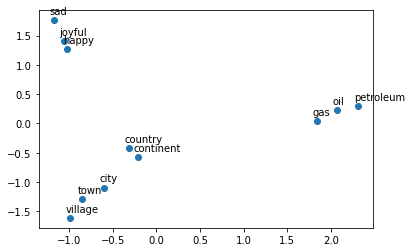

In [34]:
result=compute_pca(X,2)
plt.scatter(result[:,0],result[:,1])
for i,word in enumerate(words):
    plt.annotate(word,(result[i,0]-0.05,result[i,1]+0.1))

Words with `similar meaning` are groupped as their `vectors are close` to each other.